<h1> Extraindo dados de ações</h1>

<p><b>Uma ação (Também conhecida como patrimônio líquido) é um título que representa a propriedade de uma fração de uma empresa. dando ao proprietario das ações uma proporção dos ativos e lucros da empresa igual à quantidade de ações que eles possuem. As unidades de estoque são chamadas de "ações".</p></b>

Um investidor pode comprar uma ação e vendê-la mais tarde. Se o preço da ação aumenta, o investidor lucra. Se ele diminui, o investidor sofre prejuízo.

Escolhemos duas ações do mesmo meio industrial do Ecommerce para compararmos - Alibaba(BABA), Amazon(AMZN).

<h2>Índice</h2>
<div class = "alert alert-block alert-info" style="margin-top: 20x">
    <ul>
        <li>Usando yfinance para extrair informações das ações</li>
        <li> Usando yfnance para extrair o hitorico de precos</li>
        <li> Usando yfinance para extrair historico de dividendos</li>
        <li>WebScreaping para extrais hisotrico de receita</li>
        <li>Previsão de tendencia</li>
    </ul>
</div>

<h2>Bibliotecas</h2>

In [108]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from bs4 import BeautifulSoup
from plotly.subplots import make_subplots
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<h3>Armazenar os dados na varivel "amazon"</h3>

In [4]:
amazon = yf.Ticker("AMZN")

<h2>Extraindo informações<h/2>

In [8]:
amazon_info = amazon.info
amazon_info

{'zip': '98109-5210',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 1335000,
 'longBusinessSummary': 'Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, skill and app developers, and others to publish 

 - <h3>País da empresa</h3>

In [6]:
amazon_info['country']

'United States'

 - <h3>Setor de atuação</h3>

In [7]:
amazon_info['sector']

'Consumer Cyclical'

 - <h3>Total em Caixa</h3>

In [10]:
amazon_info['totalCash']

89894002688

 - <h3>Total em Debito</h3>

In [11]:
amazon_info['totalDebt']

123247001600

 - <h3>Receita</h3>

In [12]:
amazon_info['revenuePerShare']

881.308

 - <h3>Volume de negociações</h3>

In [21]:
amazon_info['volume']

4616556

<h2>Extraindo preço da ação</h2>



In [42]:
amazon_extra  = amazon.history(period="max")

In [43]:
amazon_extra.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0


In [44]:
#Corrigindo o DataFrame
amazon_extra.reset_index(inplace=True)

In [45]:
amazon_extra.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6122,2021-09-13,3482.800049,3497.959961,3438.000000,3457.169922,2569000,0,0.0
6123,2021-09-14,3475.550049,3486.810059,3437.709961,3450.000000,1936900,0,0.0
6124,2021-09-15,3442.520020,3485.419922,3402.010010,3475.790039,2957500,0,0.0
6125,2021-09-16,3459.959961,3492.550049,3446.139893,3488.239990,2583600,0,0.0
6126,2021-09-17,3488.409912,3497.409912,3452.129883,3462.520020,4614100,0,0.0


<h3>Plot de grafico de linhas</h3>

<AxesSubplot:xlabel='Date'>

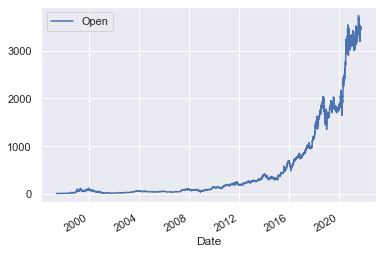

In [155]:
#ABERTURA
amazon_extra.plot(x="Date", y='Open')

<AxesSubplot:xlabel='Date'>

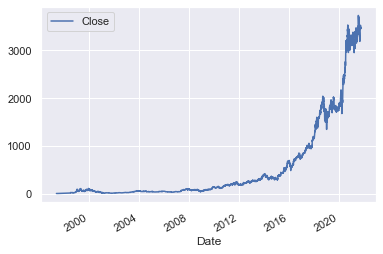

In [156]:
#FECHAMENTO
amazon_extra.plot(x="Date", y="Close")

<h3>Extraindo dividendos</h3>

*Os dividendos são a distribuição dos lucros de uma empresa aos acionistas. Nesse caso, eles são definidos como uma qnatia de dinheiro devolvida por ação que um investidor possui.*

In [47]:
amazon_dividendos = amazon.dividends
amazon_dividendos

Series([], Name: Dividends, dtype: int64)

*A empresa amazon(AMZN) não distribui dividendos.*

<h3>Extrair dados de receita</h3>

In [48]:
#FUNÇÃO GRAPH(VAMOS CHAMAR ELA PARA PLOTAR O GRAFICO DE HISTORICO NO FINAL)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

<h2>Webscraping para buscarmos os dados historicos da receita (AMZN)</h2>

In [28]:
url_amazon = "https://www.macrotrends.net/stocks/charts/AMZN/amazon/stock-price-history"

amazon_html_data = requests.get(url_amazon).text

In [30]:
#OBJETO SOUP
soup = BeautifulSoup(amazon_html_data, "html.parser")

In [31]:
amazon_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    amazon_revenue = amazon_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
    

In [35]:
#REMOVE VÍRGULAS E CRIFRÃO
amazon_revenue.dropna(inplace=True)

amazon_revenue = amazon_revenue[amazon_revenue['Revenue'] !=""]

In [37]:
amazon_revenue["Revenue"] = amazon_revenue['Revenue'].str.replace(',|\$',"")

/tmp/ipykernel_6754/2635489237.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [38]:
#PRIMEIRAS 5 LINHAS
amazon_revenue.head()

,Date,Revenue
0,2021,3314.8482
1,2020,2680.8551
2,2019,1789.1929
3,2018,1641.7262
4,2017,968.1670


In [39]:
#ULTIMAS 5 LINHAS
amazon_revenue.tail()

,Date,Revenue
19,2002,16.4817
20,2001,12.2008
21,2000,46.5500
22,1999,69.0657
23,1998,15.6647


<h2>Plot do gráfico</h2>

*Grafico de historico de preço receita*

In [49]:
#PLOTANDO O GRAFICO COM A FUNÇÃO CRIADA
make_graph(amazon_extra, amazon_revenue, "Amazon")

<h1>Serie Temporal</h1>

In [95]:
amz = amazon_extra[['Open', 'Close']]
amz.head()

,Open,Close
0,2.437500,1.958333
1,1.968750,1.729167
2,1.760417,1.708333
3,1.729167,1.635417
4,1.635417,1.427083


In [103]:
amz['Amplitude'] = amz['Close'] - amz['Open']
amz.head(5)

/tmp/ipykernel_6754/3790025938.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,Close,Amplitude
0,2.437500,1.958333,-0.479167
1,1.968750,1.729167,-0.239583
2,1.760417,1.708333,-0.052084
3,1.729167,1.635417,-0.093750
4,1.635417,1.427083,-0.208334


In [130]:
amz_fecha = amz['Close']
amz_fecha.head()

0    1.958333
1    1.729167
2    1.708333
3    1.635417
4    1.427083
Name: Close, dtype: float64

In [135]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6127 non-null   float64
 1   Close      6127 non-null   float64
 2   Amplitude  6127 non-null   float64
dtypes: float64(3)
memory usage: 143.7 KB


<h2>Gráfico de linha com a tendencia</h2>

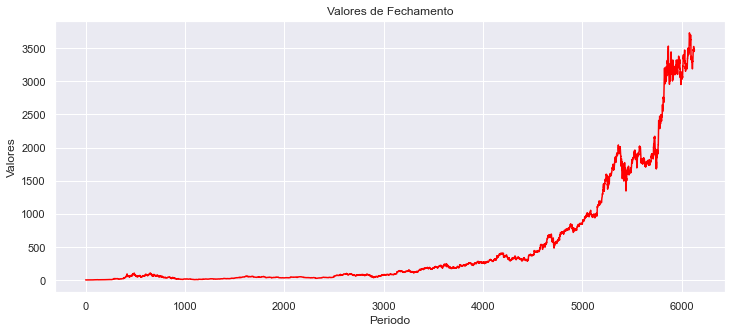

In [126]:
Eixo1 = amz['Close'].values

sns.set()
plt.figure(figsize=(12,5))
plt.title('Valores de Fechamento')
plt.xlabel('Periodo')
plt.ylabel('Valores')
plt.plot(Eixo1, color='red')


<h2>Criando o Modelo de Previsão</h2>

In [158]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

Funcao_Serie_Temporal = ExponentialSmoothing(amz_fecha, 
                                                seasonal_periods = 12, 
                                                trend='multiplicative', 
                                                seasonal='multiplicative').fit(use_boxcox=True)

/home/joao/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/home/joao/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

/home/joao/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning:

overflow encountered in matmul



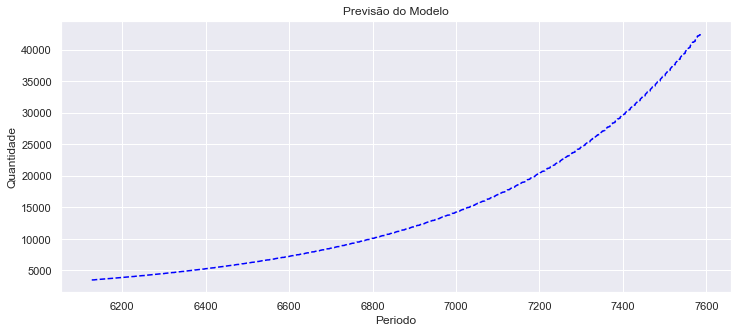

In [159]:
#DIAS QUE QUERO PREVER NO MODELO
quantos_dias_quer_prever = 1460

#CHAMADA DO FORECAST
previsao = Funcao_Serie_Temporal.forecast(quantos_dias_quer_prever)

plt.figure(figsize=(12,5))
plt.title('Previsão do Modelo')
plt.xlabel('Periodo')
plt.ylabel("Quantidade")
plt.plot(previsao, color='blue', linestyle='--');

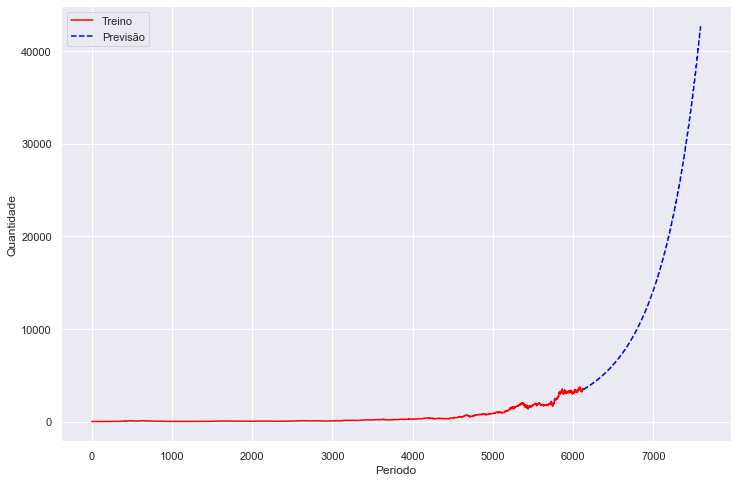

In [160]:
plt.figure(figsize=(12,8))
plt.plot(amz['Close'], label='Treino', color='red')
plt.plot(previsao, label='Previsão', color='Blue', linestyle='--')
plt.xlabel('Periodo')
plt.ylabel('Quantidade')
plt.legend(loc=0)

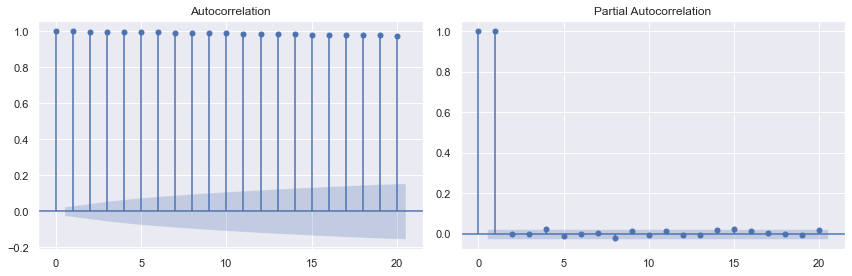

In [148]:
import statsmodels.tsa.api as smt

fig, axes = plt.subplots(1,2)

fig.set_figwidth(12)
fig.set_figheight(4)

smt.graphics.plot_acf(amz_fecha, lags=20, ax=axes[0])

smt.graphics.plot_pacf(amz_fecha, lags=20, ax=axes[1])
plt.tight_layout()


<h1>Ainda falta fazer da empresa alibaba</h1>